In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../input_data/AdmissionDataset/data.csv")
df_r, df_c = dataset.shape
target = 'Chance of Admit '

Shuffle the rows

In [3]:
# dataset = dataset.sample(frac=1)
dataset = dataset.drop(['Serial No.'], axis=1)

In [4]:
def normalise(df):
    global target
    cols = df.columns
    for c in cols:
        if c != target:
            sd = df[c].std()
            mean = df[c].mean()
            
            df[c] = (df[c] - mean)/sd
    return df
dataset = normalise(dataset)

In [5]:
target_values = dataset[target]

Split in k folds

In [6]:
from sklearn.model_selection import KFold

In [7]:
def makeX(df):
    if target in df.columns:
        df = df.drop([target], axis=1)
    X = df.values
    X = np.insert(X, 0, values=1, axis=1)
    return X


In [8]:
X = makeX(dataset)

In [9]:
def initTheta(n):
    theta = np.zeros(n - 2 + 1) #remove chance of admit, serial no. add 1 b0 col
    return theta

In [10]:
def gradientDescent(mat, actual, alpha, lmbda, iterations):
  
    theta = initTheta(df_c) #df_c: no of columns in original dataframe
    m = len(mat)
    for i in range(0, iterations):
        pred =  np.dot(mat, theta)
        error = np.array(pred - actual)
        gradient =  np.dot(error, mat[:,0])/m
        theta[0] = theta[0] - alpha*gradient

        for j in range(1, len(theta)):
            gradient =  np.dot(error, mat[:,j])/m

            coeff = (lmbda * theta[j])/m

            gradient += coeff
            theta[j] = theta[j] - alpha*gradient
            
    return theta

In [11]:
def costFunc(true, pred, theta, lmbda):   
    loss = pred - true
    squared_error = np.sum((loss)**2)
    
    cost = squared_error + lmbda*np.sum(np.dot(theta.T, theta))
    
    return cost

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
alpha = 0.001
lmbda = 0.01
iterations = 1000

In [14]:
y = target_values.values
k_error_list = []
k_val =  np.arange(2,50,1)
for k in k_val:
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
    error_list = []
#     print k,
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X[train_index], X[test_index]

        y_train, y_test = y[train_index], y[test_index]

        theta = gradientDescent(X_train, y_train, alpha, lmbda, iterations)
     
        y_pred = np.dot(X_test, theta)
        err = mean_squared_error(y_pred,y_test)
        error_list.append(err)
#     print "-----------------"
    k_error_list.append(np.mean(error_list))
print "Error list:", k_error_list

Error list: [0.07528077720250234, 0.07512413619583096, 0.07526129574889692, 0.07515761757103663, 0.07505618283392744, 0.07538783228736767, 0.07532958414554, 0.07557486521416437, 0.07527544195473057, 0.07539799189822176, 0.07526495535399728, 0.07532198128032805, 0.07525879228397717, 0.07528406970784943, 0.07534038724599802, 0.07537207387388052, 0.07529770081588748, 0.07517841696386648, 0.0751666570992189, 0.07551144514460263, 0.07545971632051506, 0.07544589714119818, 0.0752218944710392, 0.07524485031469158, 0.07535191773881611, 0.07550224595768455, 0.07537430411249386, 0.07527590045808535, 0.07526699896821128, 0.07542997295043646, 0.07540243865551446, 0.07551404029313766, 0.07547575286076079, 0.07522658406160511, 0.0752864957825555, 0.07524012452430677, 0.07549477438422655, 0.0753891389877784, 0.07528722261643302, 0.07532976132732766, 0.07539902288985012, 0.07538479125653934, 0.07530435378795557, 0.07545204189087715, 0.07534997822397216, 0.07547102932956823, 0.07533731540937354, 0.07534

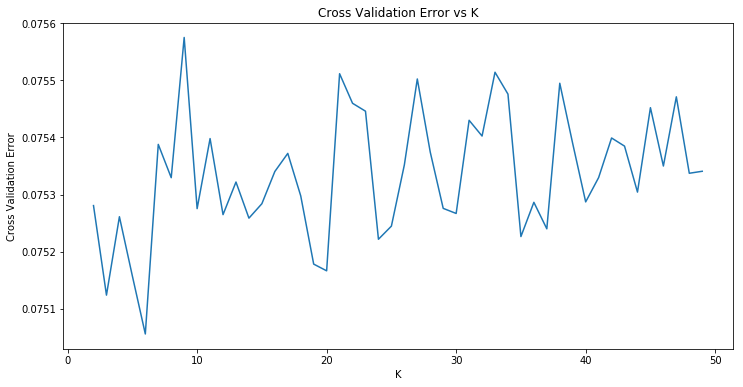

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(k_val, k_error_list)
ax.set_xlabel("K")
ax.set_ylabel("Cross Validation Error")
ax.set_title("Cross Validation Error vs K")
plt.show()

In [16]:
k_error_list = []
kf = KFold(n_splits=len(X))
kf.get_n_splits(X)
error_list = []
for train_index, test_index in kf.split(X):
#     print "train index: ",len(train_index), "test index: ", len(test_index)
    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test = y[train_index], y[test_index]

    theta = gradientDescent(X_train, y_train, alpha, lmbda, 1000)

    y_pred = np.dot(X_test, theta)
    err = costFunc(y_pred,y_test, theta, lmbda)
    error_list.append(err)
print len(error_list)

450


In [17]:
print np.mean(error_list)

0.07775535237280554
